In [22]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 데이터 생성
data = {
    '이름': ['오렌지', '포도', '견과류', '새우', '생선', '콩', '베이컨', '바나나', '배', '오이', '치즈', '당근', '사과', '샐러리', '양상추'],
    '당도': [7, 8, 3, 2, 3, 3, 1, 10, 10, 2, 1, 5, 10, 3, 1],
    '아삭함': [3, 5, 6, 3, 1, 7, 4, 1, 7, 8, 1, 10, 9, 10, 9],
    '종류': ['과일', '과일', '단백질', '단백질', '단백질', '채소', '단백질', '과일', '과일', '채소', '단백질', '채소', '과일', '채소', '채소']
}

# 데이터프레임 생성
df = pd.DataFrame(data)
df

,이름,당도,아삭함,종류
0,오렌지,7,3,과일
1,포도,8,5,과일
2,견과류,3,6,단백질
3,새우,2,3,단백질
4,생선,3,1,단백질
5,콩,3,7,채소
6,베이컨,1,4,단백질
7,바나나,10,1,과일
8,배,10,7,과일
9,오이,2,8,채소


In [23]:
from sklearn.cluster import KMeans
import numpy as np
X = df.drop(["종류","이름"],axis=1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(f'cluster{kmeans.labels_}')
print(f'중심점: {kmeans.cluster_centers_}')
#print(kmeans.n_iter_)
print(f'응집도: {kmeans.inertia_}')

cluster[0 0 1 1 1 1 1 0 0 1 1 1 0 1 1]
중심점: [[9.  5. ]
 [2.4 5.9]]
응집도: 171.3


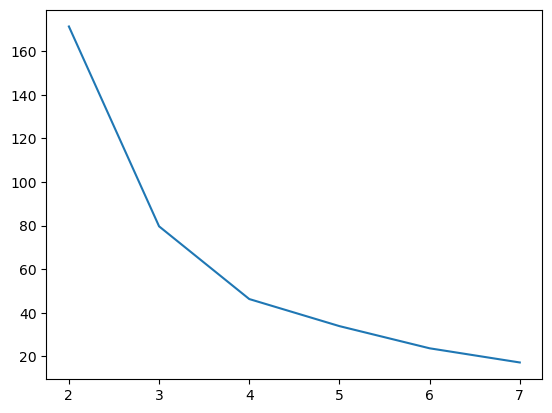

In [24]:
import matplotlib.pyplot as plt
temp=[]
for i in range(2,8):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X)
  temp.append(kmeans.inertia_)
plt.plot(range(2,8),temp)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['종류'] = le.fit_transform(df['종류'])

X = df[['당도', '아삭함']]
y = df['종류']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


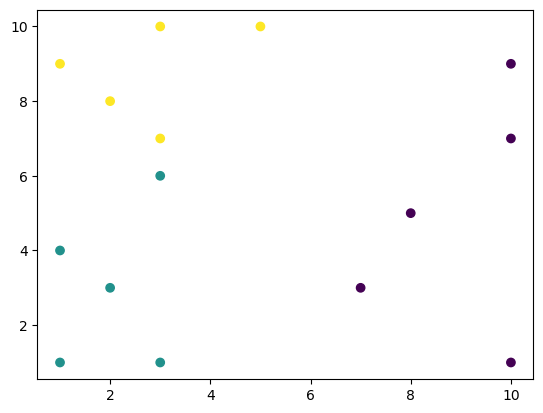

In [31]:
x = df['당도']
y = df['아삭함']
c_c = df['종류']
plt.style.use('default')
plt.scatter(x, y, c= c_c)
plt.show()

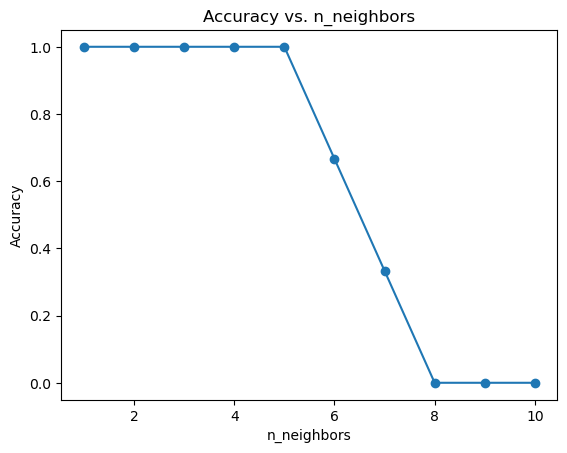

In [32]:
n_neighbors_values = list(range(1, 11))
accuracy_values = []

for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(n_neighbors_values, accuracy_values, marker='o')
plt.title('Accuracy vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()